In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'matplotlib'

In [3]:
import warnings

warnings.filterwarnings('ignore')

In [4]:
import cv2

cv2.__version__

'4.6.0'

In [5]:
img = cv2.imread('data/sample.png')

In [6]:
type(img)

numpy.ndarray

In [7]:
img.shape

(256, 256, 3)

In [8]:
img.dtype

dtype('uint8')

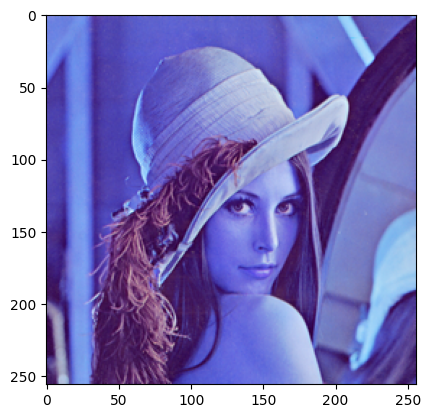

In [9]:
plt.imshow(img)

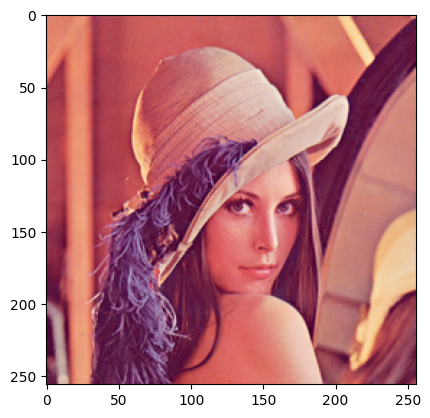

In [10]:
# BGR -> RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)

In [11]:
from PIL import Image

img = Image.open('data/sample.png')

In [12]:
type(img)

PIL.PngImagePlugin.PngImageFile

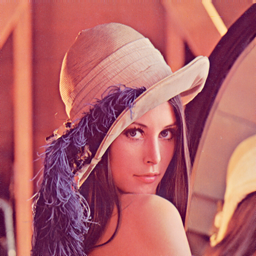

In [13]:
img

In [14]:
import numpy as np

img = np.array(img)

# check class
type(img)

numpy.ndarray

In [15]:
img.shape

(256, 256, 3)

In [16]:
img.dtype

dtype('uint8')

In [17]:
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

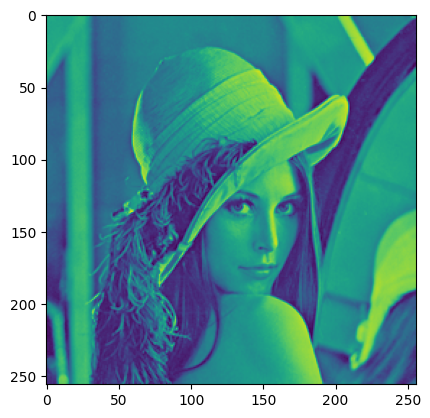

In [18]:
plt.imshow(img_gray)

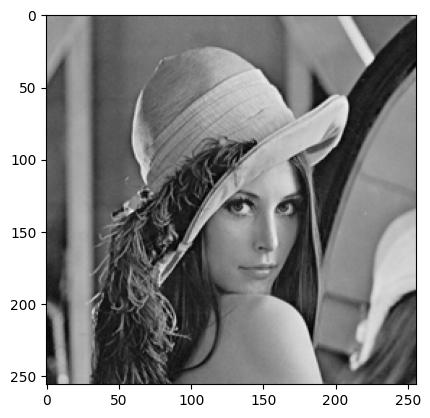

In [19]:
plt.gray()
plt.imshow(img_gray)

In [20]:
img_gray.shape

(256, 256)

In [21]:
kernel = np.array([
    [-1, 0, 1],
    [-1, 0, 1],
    [-1, 0, 1]
])

In [22]:
img_conv = cv2.filter2D(img_gray, -1, kernel)

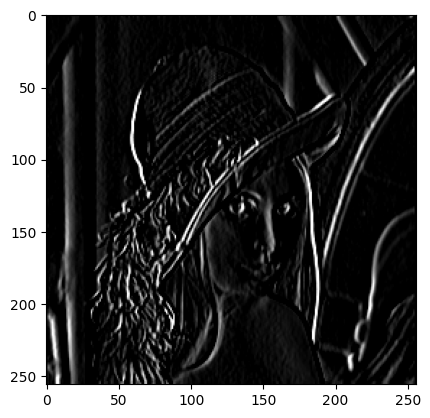

In [23]:
plt.gray()
plt.imshow(img_conv)

In [24]:
# definition of horizontal filter
kernel = np.array([
    [-1, -1, -1],
    [0, 0, 0],
    [1, 1, 1]
])

# convolution
img_conv = cv2.filter2D(img_gray, -1, kernel)

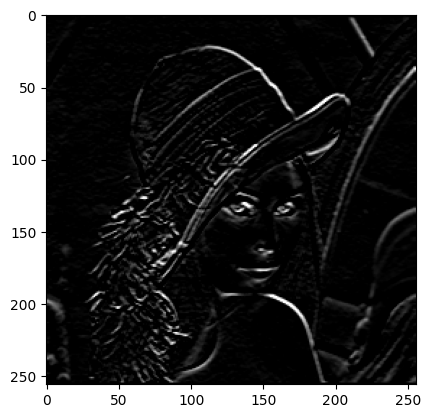

In [25]:
plt.gray()
plt.imshow(img_conv)

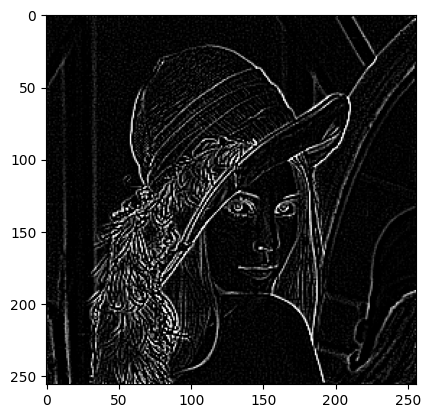

In [26]:
# definition of laplacian filter
kernel = np.array([
    [1, 1, 1],
    [1, -8, 1],
    [1, 1, 1]
])

img_conv = cv2.filter2D(img_gray, -1, kernel)

plt.gray()
plt.imshow(img_conv)

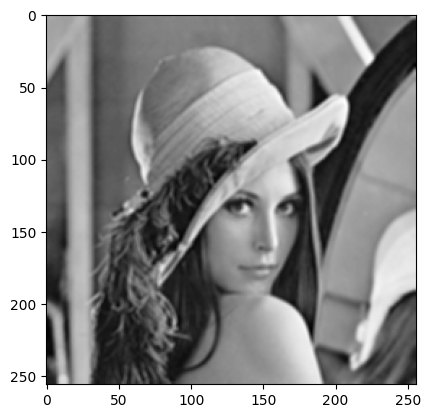

In [27]:
# definition of somoothing filter
kernel = np.array([
    [1, 1, 1],
    [1, 1, 1],
    [1, 1, 1]
]) / 9

img_conv = cv2.filter2D(img_gray, -1, kernel)

plt.gray()
plt.imshow(img_conv)

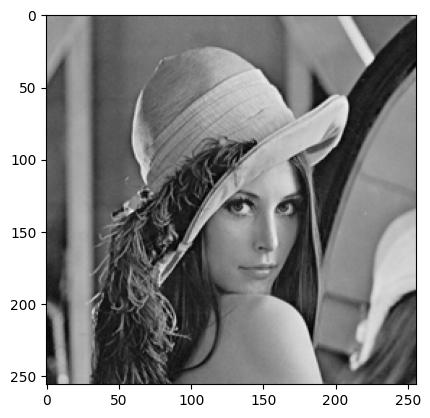

In [28]:
plt.imshow(img_gray)

In [29]:
import torch
import torchvision
from torchvision import transforms

torch.__version__, torchvision.__version__

('1.12.1+cu102', '0.13.1+cu102')

In [30]:
transform = transforms.Compose([
    transforms.ToTensor()
])

In [31]:
train = torchvision.datasets.MNIST(root='data', train=True, download=True, transform=transform)

In [32]:
train

Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
           )

In [33]:
len(train)

60000

In [34]:
type(train[0])

tuple

In [35]:
# input value
train[0][0]

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [36]:
train[0][1]

5

In [37]:
# the size of input value -> (0:channel, 1:height, 2:width)
train[0][0].shape

torch.Size([1, 28, 28])

In [38]:
# (0:channel, 1:height, 2:width) -> (1:height, 2:width, 3:channel)
img = np.transpose(train[0][0], (1, 2, 0))

img.shape

torch.Size([28, 28, 1])

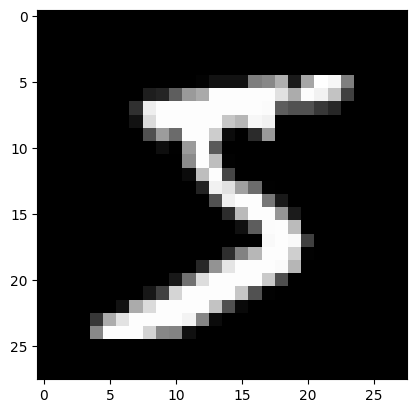

In [39]:
img = img.reshape([28, 28,1])
plt.gray()
plt.imshow(img)

In [40]:
import torch.nn as nn
import torch.nn.functional as F

In [41]:
x = train[0][0]

In [42]:
x.shape

torch.Size([1, 28, 28])

In [43]:
# definition of convolution layer
conv = nn.Conv2d(in_channels=1, out_channels=4, kernel_size=3, stride=1, padding=1)

In [44]:
conv.weight

Parameter containing:
tensor([[[[-0.1583, -0.3295, -0.2052],
          [-0.1850,  0.0807, -0.1327],
          [ 0.2670, -0.2246,  0.3089]]],


        [[[-0.2567,  0.0779, -0.3013],
          [ 0.0503, -0.2813,  0.0966],
          [ 0.2729,  0.0412, -0.1547]]],


        [[[-0.0019,  0.1186,  0.0644],
          [ 0.3182,  0.0978,  0.0129],
          [-0.1146, -0.2215, -0.2512]]],


        [[[ 0.2084,  0.3031,  0.1255],
          [ 0.0341, -0.0148,  0.2431],
          [-0.2018, -0.2229,  0.0832]]]], requires_grad=True)

In [45]:
conv.weight.shape

torch.Size([4, 1, 3, 3])

In [46]:
# resize in order to be batchsize=1 => (batchsize, channels, height, width)
x = x.reshape(1, 1, 28, 28)

# convolution
x = conv(x)


In [47]:
x

tensor([[[[-0.0811, -0.0811, -0.0811,  ..., -0.0811, -0.0811, -0.0811],
          [-0.0811, -0.0811, -0.0811,  ..., -0.0811, -0.0811, -0.0811],
          [-0.0811, -0.0811, -0.0811,  ..., -0.0811, -0.0811, -0.0811],
          ...,
          [-0.0811, -0.0811, -0.0811,  ..., -0.0811, -0.0811, -0.0811],
          [-0.0811, -0.0811, -0.0811,  ..., -0.0811, -0.0811, -0.0811],
          [-0.0811, -0.0811, -0.0811,  ..., -0.0811, -0.0811, -0.0811]],

         [[-0.1393, -0.1393, -0.1393,  ..., -0.1393, -0.1393, -0.1393],
          [-0.1393, -0.1393, -0.1393,  ..., -0.1393, -0.1393, -0.1393],
          [-0.1393, -0.1393, -0.1393,  ..., -0.1393, -0.1393, -0.1393],
          ...,
          [-0.1393, -0.1393, -0.1393,  ..., -0.1393, -0.1393, -0.1393],
          [-0.1393, -0.1393, -0.1393,  ..., -0.1393, -0.1393, -0.1393],
          [-0.1393, -0.1393, -0.1393,  ..., -0.1393, -0.1393, -0.1393]],

         [[-0.1903, -0.1903, -0.1903,  ..., -0.1903, -0.1903, -0.1903],
          [-0.1903, -0.1903, -

In [48]:
x.shape

torch.Size([1, 4, 28, 28])

In [49]:
x = F.max_pool2d(x, kernel_size=2, stride=2)

In [50]:
x.shape

torch.Size([1, 4, 14, 14])

In [51]:
print('channel1:', x.shape[1])
print('channel2:', x.shape[2])
print('channel3:', x.shape[3])

channel1: 4
channel2: 14
channel3: 14


In [52]:
x_shape = x.shape[1] * x.shape[2] * x.shape[3]
x_shape

784

In [53]:
# num of sample is set automatically because vector size is already known in this case
# if -1, automatically setting along to the other element
x = x.view(-1, x_shape)

x.shape

torch.Size([1, 784])

In [54]:
# definition of fully connected layer
fc = nn.Linear(x_shape, 10) # 784 => 10

# linear transform
x = fc(x)

x.shape

torch.Size([1, 10])

In [55]:
# get dataset(if there are no data, download them)
from operator import truediv


train_val = torchvision.datasets.MNIST(root='data', train=True, download=True, transform=transform)
test = torchvision.datasets.MNIST(root='data', train=False, download=True, transform=transform)

# train : val = 0.8 : 0.2
n_train = int(len(train_val) * 0.8)
n_val = len(train_val) - n_train

# for random split, fix random num seed and retain reproductivity
torch.manual_seed(0)

# split train and val
train, val = torch.utils.data.random_split(train_val, [n_train, n_val])

# prepare dataloader
batch_size = 32

train_loader = torch.utils.data.DataLoader(train, batch_size, shuffle=True, drop_last = True)
val_loader = torch.utils.data.DataLoader(val, batch_size)
test_loader = torch.utils.data.DataLoader(test, batch_size)

In [56]:
from torch.utils.data import DataLoader
import pytorch_lightning as pl
from pytorch_lightning import Trainer
import torchmetrics

class Net(pl.LightningModule):

    def __init__(self):
        super().__init__()

        # definition of convolution layer
        self.conv = nn.Conv2d(in_channels=1, out_channels=3, kernel_size=(3, 3))
        # definition of fully connected layer
        self.fc = nn.Linear(507, 10)

        self.train_acc = torchmetrics.Accuracy()
        self.val_acc = torchmetrics.Accuracy()
        self.test_acc = torchmetrics.Accuracy()

    def forward(self, x):
        # convolution
        h = self.conv(x)
        # max pooling
        h = F.max_pool2d(h, kernel_size=(2, 2), stride=2)
        # Relu function
        h = F.relu(h)
        # vectorize
        h = h.view(-1, 507)
        # linear transform
        h = self.fc(h)
        return h

    def training_step(self, batch, batch_index):
        x, t = batch
        y = self(x)
        loss = F.cross_entropy(y, t)
        self.log('train_loss', loss, on_step=True, on_epoch=True)
        self.log('train_acc', self.train_acc(y, t), on_step=True, on_epoch=True)
        return loss

    def validation_step(self, batch, batch_idx):
        x, t = batch
        y = self(x)
        loss = F.cross_entropy(y, t)
        self.log('val_loss', loss, on_step=False, on_epoch=True)
        self.log("val_acc", self.val_acc(y, t), on_step=False, on_epoch=True)
        return loss

    def test_step(self, batch, batch_idx):
        x, t = batch
        y = self(x)
        loss = F.cross_entropy(y, t)
        self.log('test_loss', loss, on_step=False, on_epoch=True)
        self.log('test_acc', self.test_acc(y, t), on_step=False, on_epoch=True)
        return loss

    def configure_optimizers(self):
        optimizer = torch.optim.SGD(self.parameters(), lr=0.01)
        return optimizer

In [57]:
# learning
pl.seed_everything(0)
net = Net()
trainer = pl.Trainer(max_epochs=10, gpus=0)
trainer.fit(net, train_loader, val_loader)

# test
results = trainer.test(test_dataloaders=test_loader)

# check result
results

Global seed set to 0
/home/vscode/.local/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/accelerator_connector.py:446: LightningDeprecationWarning: Setting `Trainer(gpus=0)` is deprecated in v1.7 and will be removed in v2.0. Please use `Trainer(accelerator='gpu', devices=0)` instead.
  rank_zero_deprecation(
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name      | Type     | Params
---------------------------------------
0 | conv      | Conv2d   | 30    
1 | fc        | Linear   | 5.1 K 
2 | train_acc | Accuracy | 0     
3 | val_acc   | Accuracy | 0     
4 | test_acc  | Accuracy | 0     
---------------------------------------
5.1 K     Trainable params
0         Non-trainable params
5.1 K     Total params
0.020     Total estimated model params size (MB)


Epoch 0:  14%|█▍        | 266/1875 [00:04<00:27, 57.62it/s, loss=0.839, v_num=10]

TypeError: Trainer.test() got an unexpected keyword argument 'test_dataloaders'

In [58]:
# CIFAR 10
train_val = torchvision.datasets.CIFAR10(root='data', train=True, download=True, transform=transform)
test = torchvision.datasets.CIFAR10(root='data', train=False, download=True, transform=transform)

Files already downloaded and verified
Files already downloaded and verified


In [59]:
# train : val =  0.8 : 0.2
n_train = int(len(train_val) * 0.8)
n_val = len(train_val) - n_train

# for random split, fix random num seed to maintain reproductivity
train, val = torch.utils.data.random_split(train_val, [n_train, n_val])

# prepare dataloader
batch_size = 256

train_loader = torch.utils.data.DataLoader(train, batch_size, shuffle=True, drop_last=True)
val_loader = torch.utils.data.DataLoader(val, batch_size)
test_loader = torch.utils.data.DataLoader(test, batch_size)

In [60]:
len(train), len(val), len(test)

(40000, 10000, 10000)

In [75]:
class Net(pl.LightningModule):
    
    def __init__(self):
        super().__init__()
        
        # definition of convolution layer
        self.conv = nn.Conv2d(in_channels=3, out_channels=6, kernel_size=(3, 3), padding=(1, 1))
        # definition of fully connected layer
        self.fc = nn.Linear(1536, 10)

        self.train_acc = torchmetrics.Accuracy()
        self.val_acc = torchmetrics.Accuracy()
        self.test_acc = torchmetrics.Accuracy()

    def forward(self, x):
        # convolution
        h = self.conv(x)
        # max pooling
        h = F.max_pool2d(h, kernel_size=(2, 2), stride=2)
        # ReLU function
        h = F.relu(h)
        # vectorize
        h = h.view(-1, 1536)
        # linear transform
        h = self.fc(h)
        return h

    def training_step(self, batch, batch_idx):
        x, t = batch
        y = self(x)
        loss = F.cross_entropy(y, t)
        self.log('train_loss', loss, on_step=True, on_epoch=True)
        self.log('train_acc', self.train_acc(y, t), on_step=True, on_epoch=True)
        return loss

    def validation_step(self, batch, batch_idx):
        x, t = batch
        y = self(x)
        loss = F.cross_entropy(y, t)
        self.log('val_loss', loss, on_step=False, on_epoch=True)
        self.log('val_acc', self.val_acc(y, t), on_step=False, on_epoch=True)
        return loss

    def test_step(self, batch, batch_idx):
        x, t = batch
        y = self(x)
        loss = F.cross_entropy(y, t)
        self.log('test_loss', loss, on_step=False, on_epoch=True)
        self.log('test_acc', self.test_acc(y, t), on_step=False, on_epoch=True)
        return loss

    def configure_optimizers(self):
        optimizer = torch.optim.SGD(self.parameters(), lr=0.01)
        return optimizer

In [76]:
# learning
pl.seed_everything(0)
net = Net()
trainer = pl.Trainer(max_epochs=10, gpus=0)
trainer.fit(net, train_loader, val_loader)

# test
results = trainer.test(model=net, dataloaders=test_loader)
results

Global seed set to 0
/home/vscode/.local/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/accelerator_connector.py:446: LightningDeprecationWarning: Setting `Trainer(gpus=0)` is deprecated in v1.7 and will be removed in v2.0. Please use `Trainer(accelerator='gpu', devices=0)` instead.
  rank_zero_deprecation(
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name      | Type     | Params
---------------------------------------
0 | conv      | Conv2d   | 168   
1 | fc        | Linear   | 15.4 K
2 | train_acc | Accuracy | 0     
3 | val_acc   | Accuracy | 0     
4 | test_acc  | Accuracy | 0     
---------------------------------------
15.5 K    Trainable params
0         Non-trainable params
15.5 K    Total params
0.062     Total estimated model params size (MB)


Epoch 9: 100%|██████████| 196/196 [00:10<00:00, 18.55it/s, loss=1.79, v_num=16]

`Trainer.fit` stopped: `max_epochs=10` reached.


Testing DataLoader 0: 100%|██████████| 40/40 [00:01<00:00, 21.58it/s]
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test_acc            0.3741999864578247
        test_loss           1.7933324575424194
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


[{'test_loss': 1.7933324575424194, 'test_acc': 0.3741999864578247}]

In [2]:
from torchvision.models import resnet18

In [4]:
model_conv = resnet18(weights=True)

/home/vscode/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
from torchvision import transforms, datasets
import torch

# pre-processing to adopt pre-trained model
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# get dataset
train_val = datasets.CIFAR10('./', train=True, download=True, transform=transform)
test = datasets.CIFAR10('./', train=False, download=True, transform=transform)

# split into train and val
torch.manual_seed(0)
n_train, n_val = 40000 ,10000
train, val = torch.utils.data.random_split(train_val, [n_train, n_val])

# definition of batch size
batch_size = 256

# definition of dataloader
train_loader = torch.utils.data.DataLoader()